### Self Attention 

As you’re going through an article, you may be **skimming some parts** and **attentively reading others**, depending on what your goals or interests are.

**What if your models did the same?** It’s a simple yet powerful idea: not all input information seen by a model is equally important to the task at hand, so models should “pay **more attention**” **to some features** and “pay **less attention” to other features**.

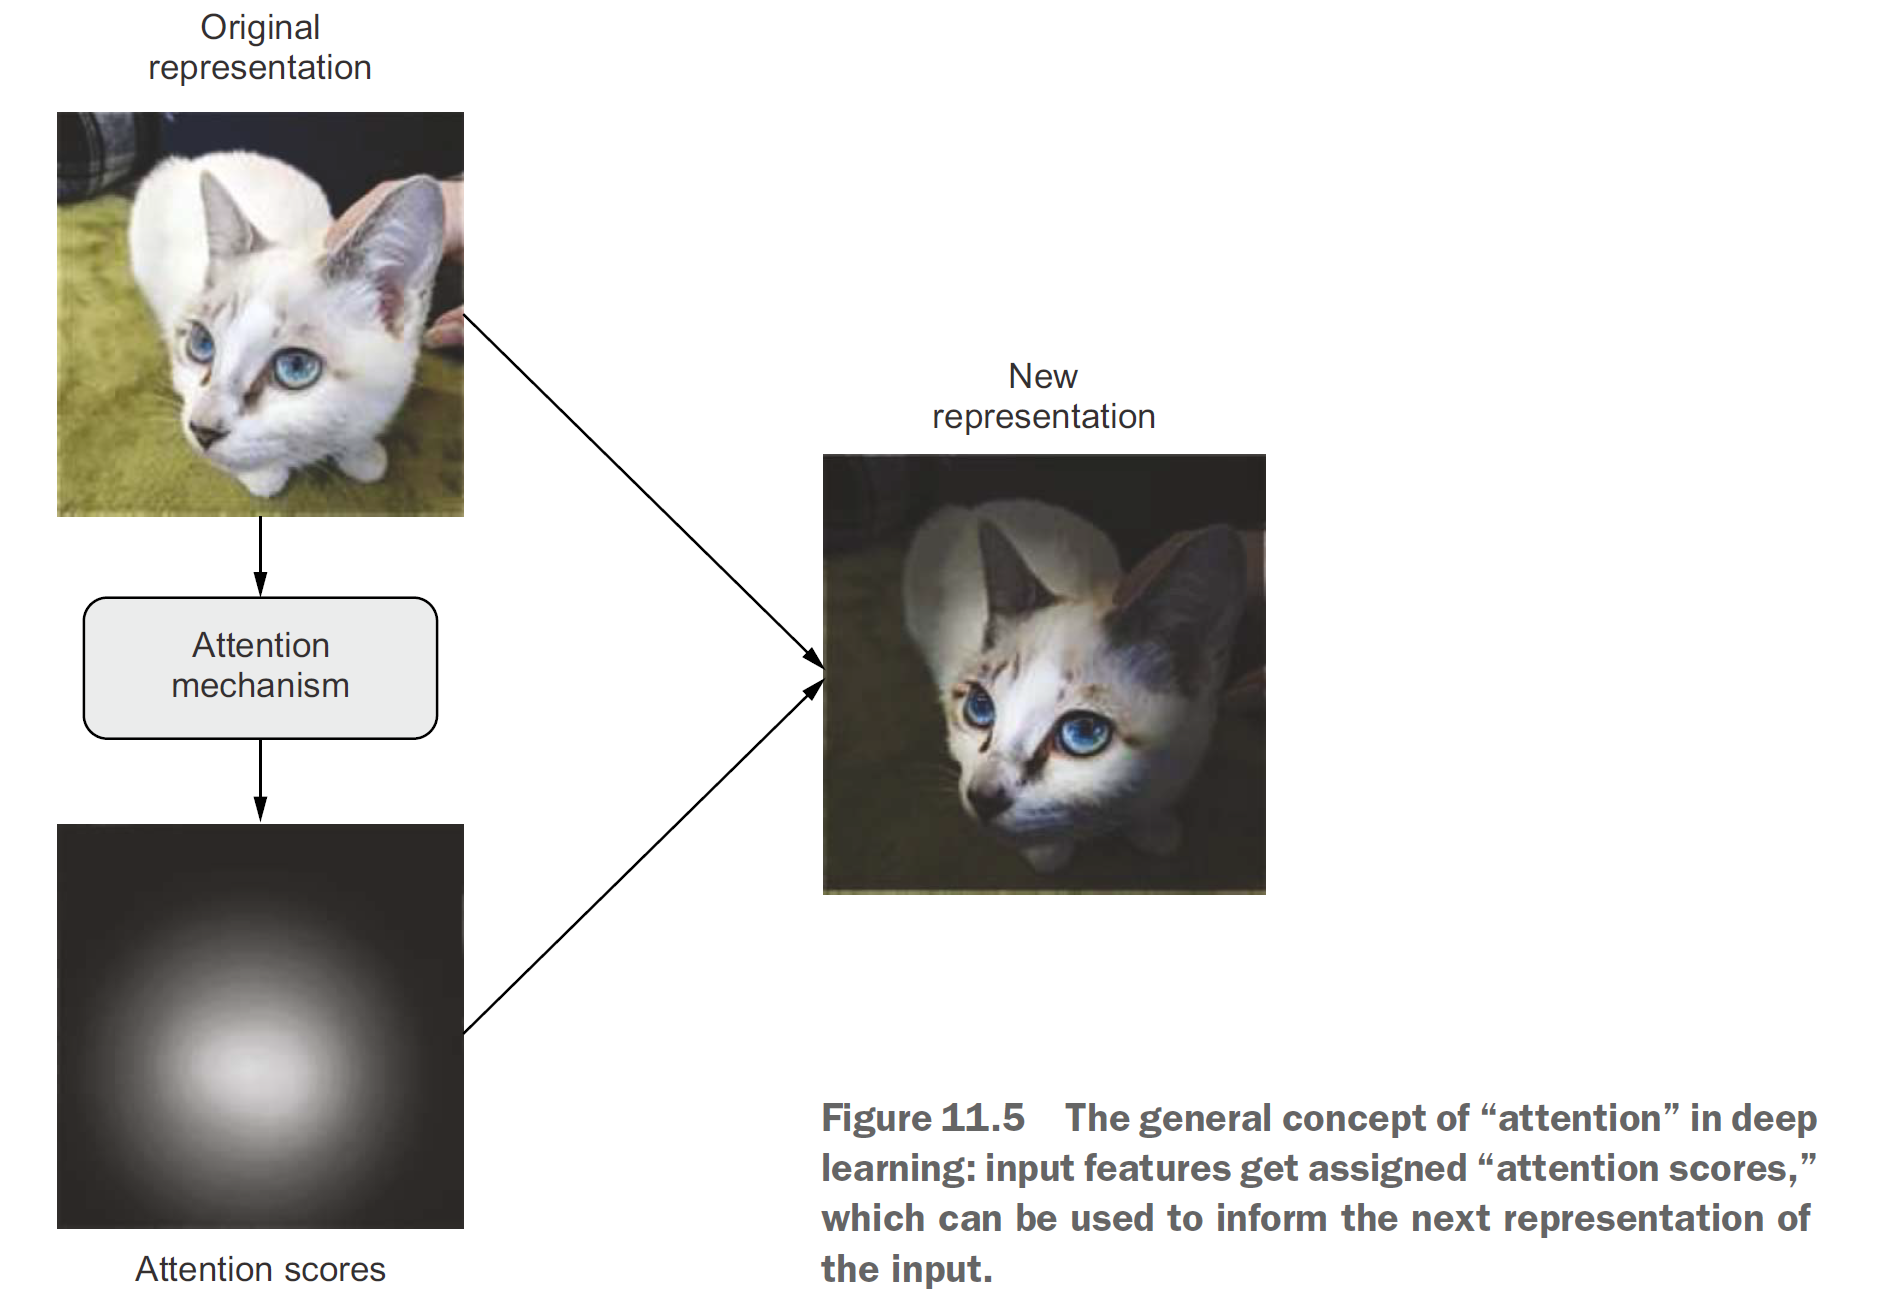

Attention mechanism can be used for more than just highlighting
or erasing certain features. It can be used to **make features context-aware**.<br>
Example: When you mark the date, you’re not talking about the same “date” as when you go on a date, nor is it the kind of date you’d buy at the market.

**self-attention:** a vector representation for a word depending on the other words surrounding it. <br>
The purpose of self-attention is to modulate the representation of a token
by using the representations of related tokens in the sequence. This produces context aware token representations.

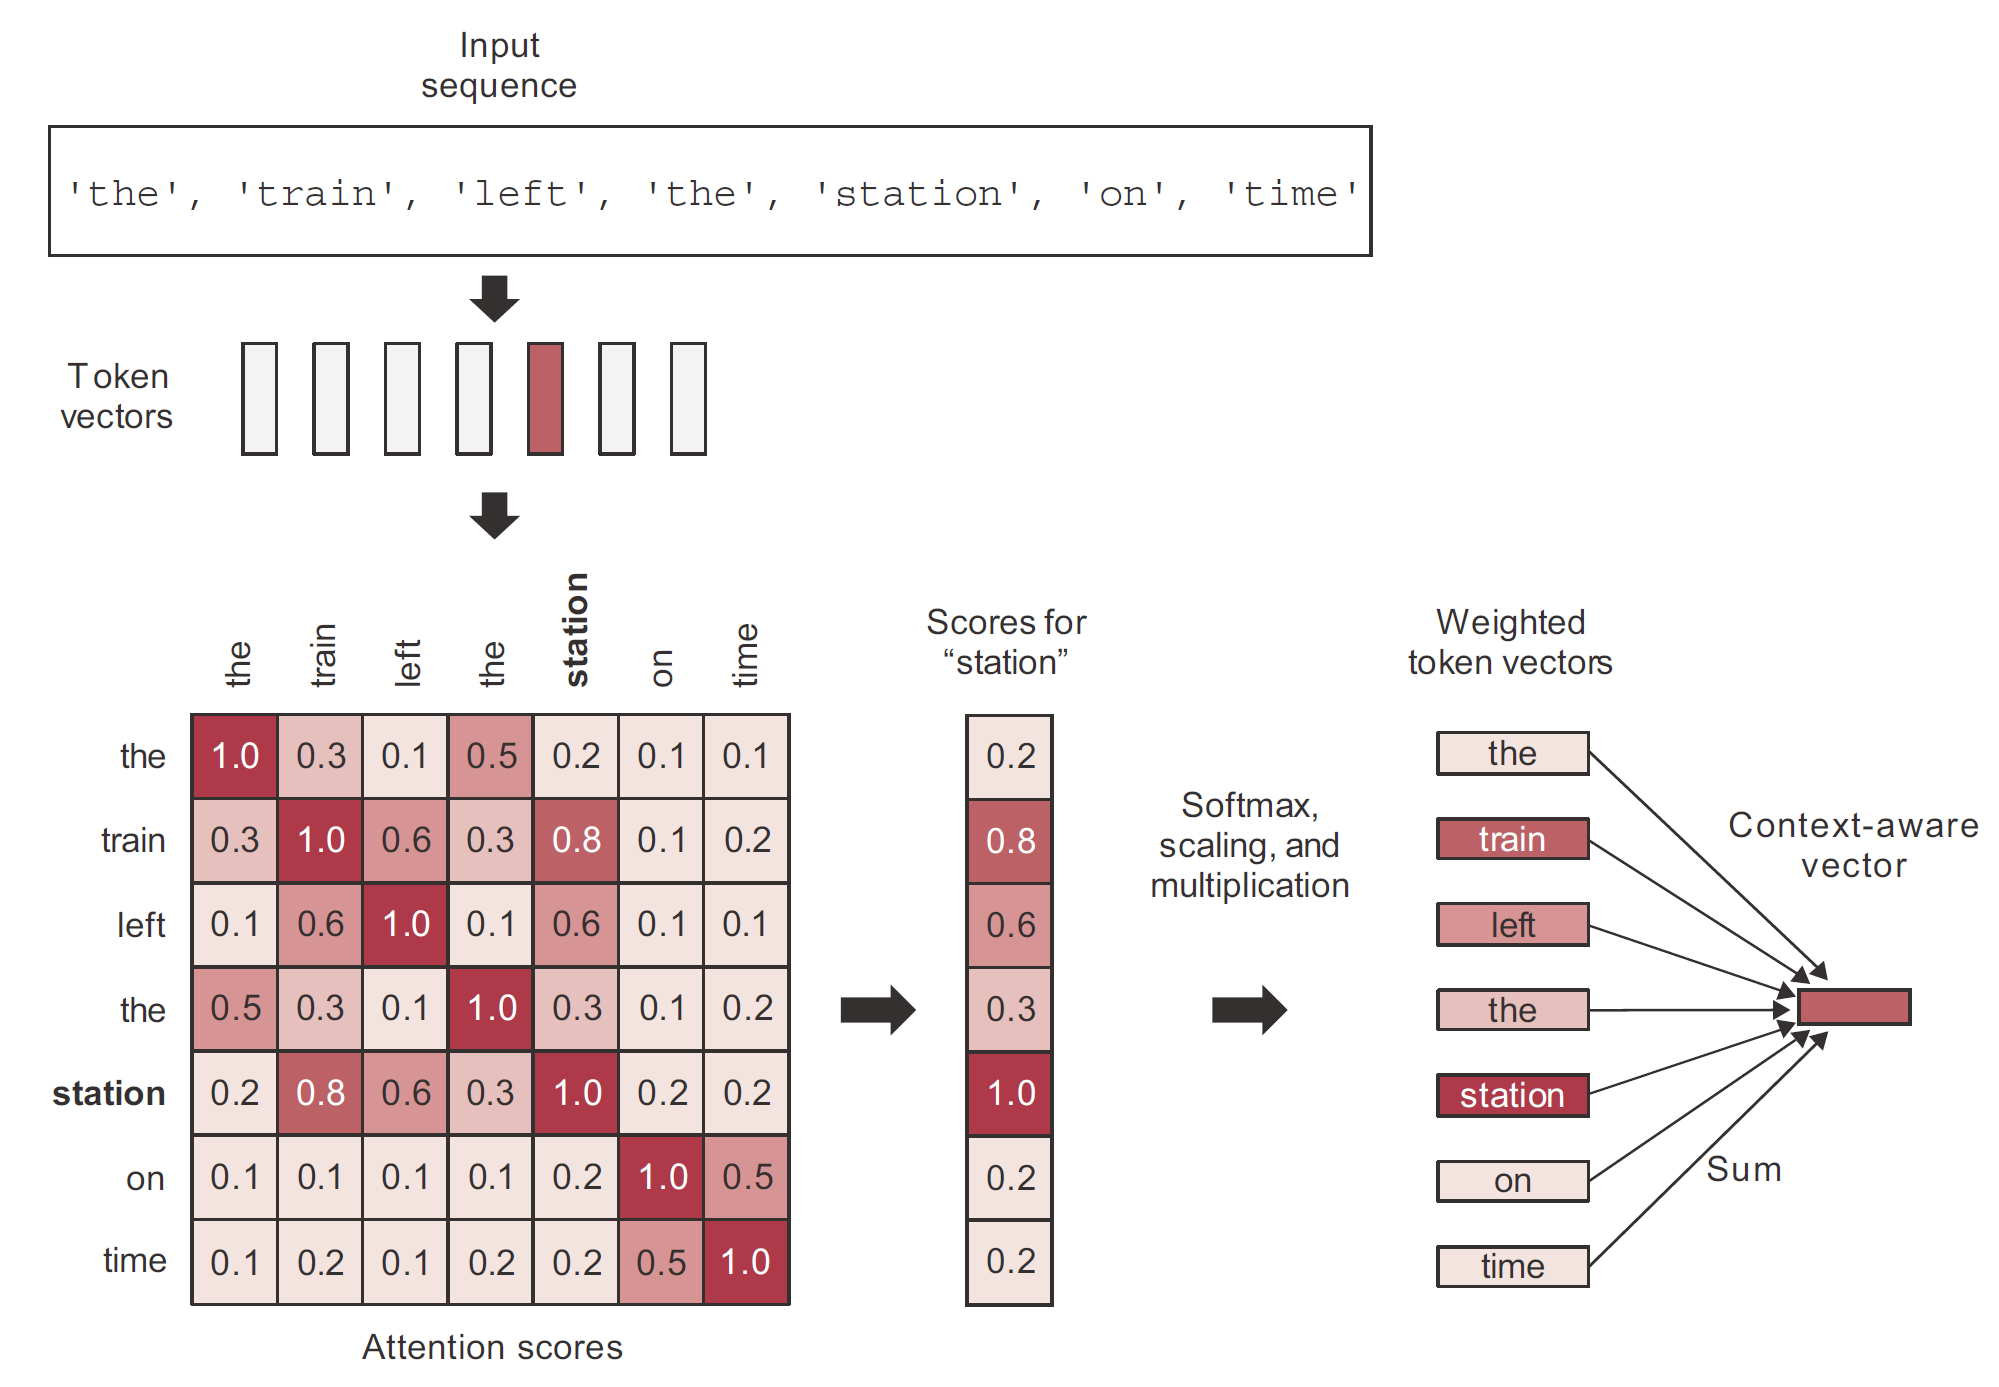

**Step 1:**compute relevancy scores between the vector for “station” and every other word in the sentence. These are our “attention scores.” <br>
We’re simply going to use the dot product between two word vectors as a measure of the strength of their relationship.

In practice, these scores will also go through a scaling function and a softmax.

**Step 2:**compute the sum of all word vectors in the sentence, weighted by our relevancy scores. <br>
Words closely related to “station” will contribute more to the sum (including the word “station” itself), while irrelevant words will contribute almost nothing.

Weighted sum = (0.2 * vector("The")) + (0.8 * vector("train")) + (0.6 * vector("left")) + (0.3 * vector("the")) + (1.0 * vector("station")) + (0.2 * vector("on")+ (0.2 * vector("time"))

The **resulting vector is our new representation for “station”**: a representation that incorporates the surrounding context. In particular, it includes part of the “train” vector, clarifying that it is, in fact, a “train station.”

Repeat this process for every word in the sentence, producing a new
sequence of vectors encoding the sentence.

Keras has a built-in layer to handle it: the MultiHeadAttention layer. Here’s how you would use it:

In [ ]:
num_heads = 4
embed_dim = 256
mha_layer = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
outputs = mha_layer(inputs, inputs, inputs)

The self-attention mechanism as we’ve introduced it
performs the following, schematically:

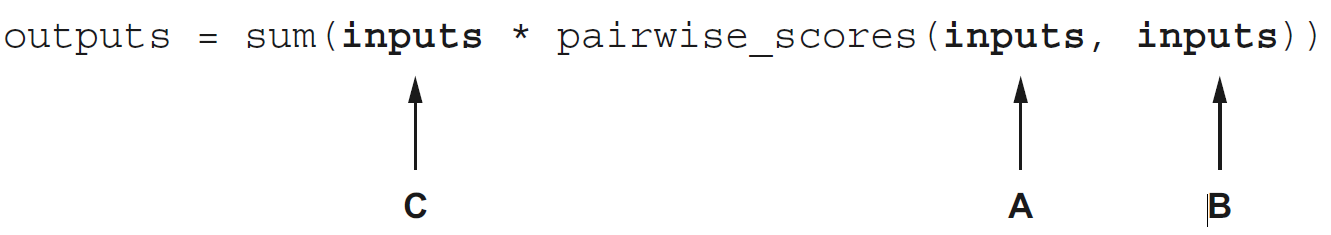

This means “for each token in inputs (A), compute how much the token is related to every token in inputs (B), and use these scores to weight a sum of tokens from inputs (C).”

In the general case, you could be doing this with three different
sequences. We’ll call them “query,” “keys,” and “values.” The operation becomes “for each element in the query, compute how much the element is related to every key, and use these scores to weight a sum of values”:

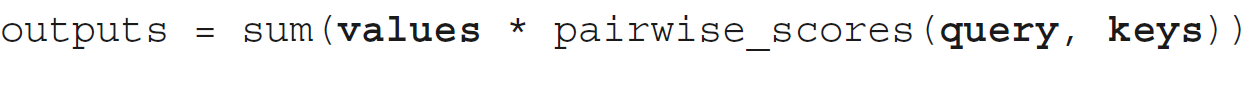

In practice, the keys and the values are often the same sequence.

This terminology comes from search engines and recommender systems. <br>
<br>
Ex: **query** to retrieve a photo from your collection—“dogs on the beach.” <br>Internally, each of your pictures in the database is described by a
set of keywords—“cat,” “dog,” “party,” etc. We’ll call those **“keys**.”


It will then rank those keys by strength of match—relevance—
and it will return the pictures associated with the top N matches, in order of relevance

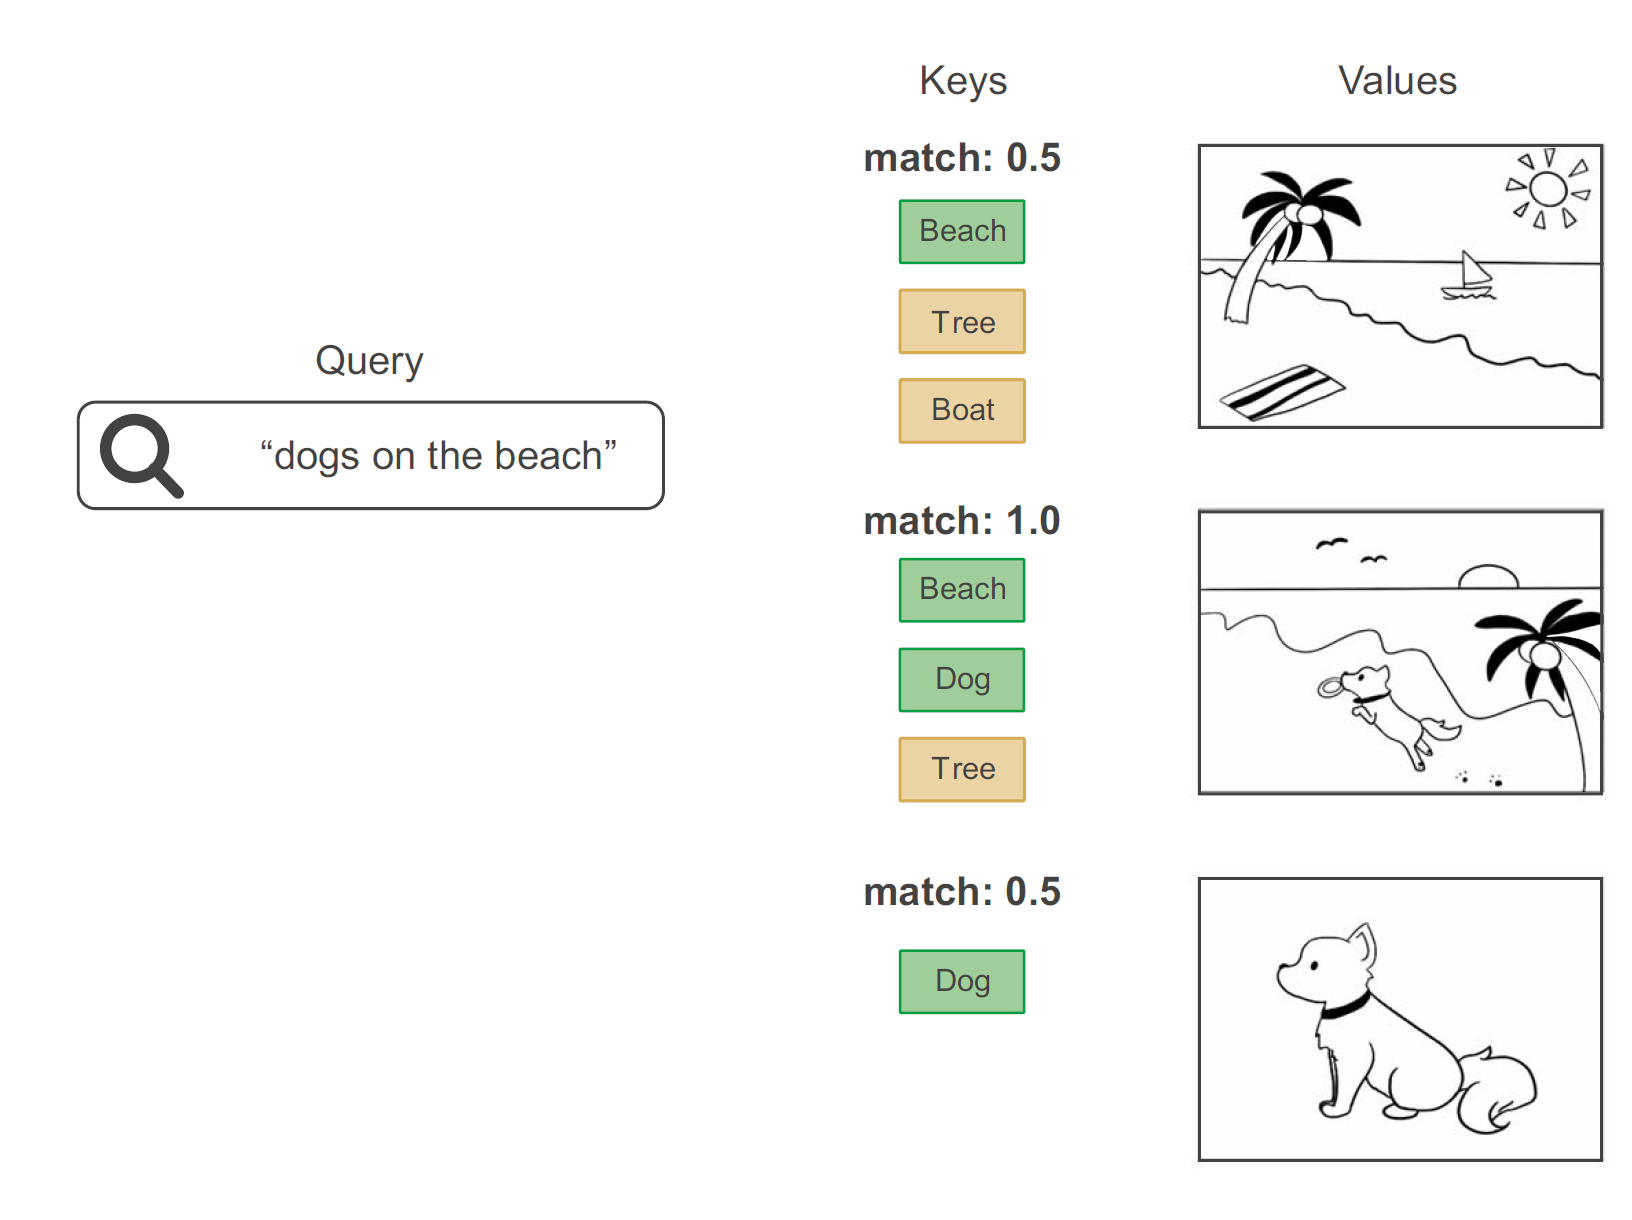

Conceptually, this is what self-attention is doing. You’ve got a reference sequence that describes **something you’re looking for: the query**. You’ve got a **body of knowledge that you’re trying to extract information from: the values**. Each **value is assigned a key that describes the value in a format that can be readily compared to a query**. You simply match the query to the keys. Then you **return a weighted sum of values**.

**In machine translation**, for instance, **the query would be the target sequence**, and the **source sequence would play the roles of both keys and values**
<br>
Ex: for each element of the target (like clima), you want to go back to the source (“How’s the weather today?”) and identify the different bits that are related to it (“tiempo” and “weather” should have a strong match).

como esta el clima hoy

If you’re just doing **sequence classification**, then query,
keys, and values are all the same: you’re comparing a sequence to itself, to enrich each token with context from the whole sequence

### Multi-Head Attention

In the multi-head attention layer, the input sequence is projected into three different subspaces: query, key, and value. These projections are learned through three different dense layers. The query, key, and value vectors are then used to compute attention weights, which are used to compute a weighted sum of the values

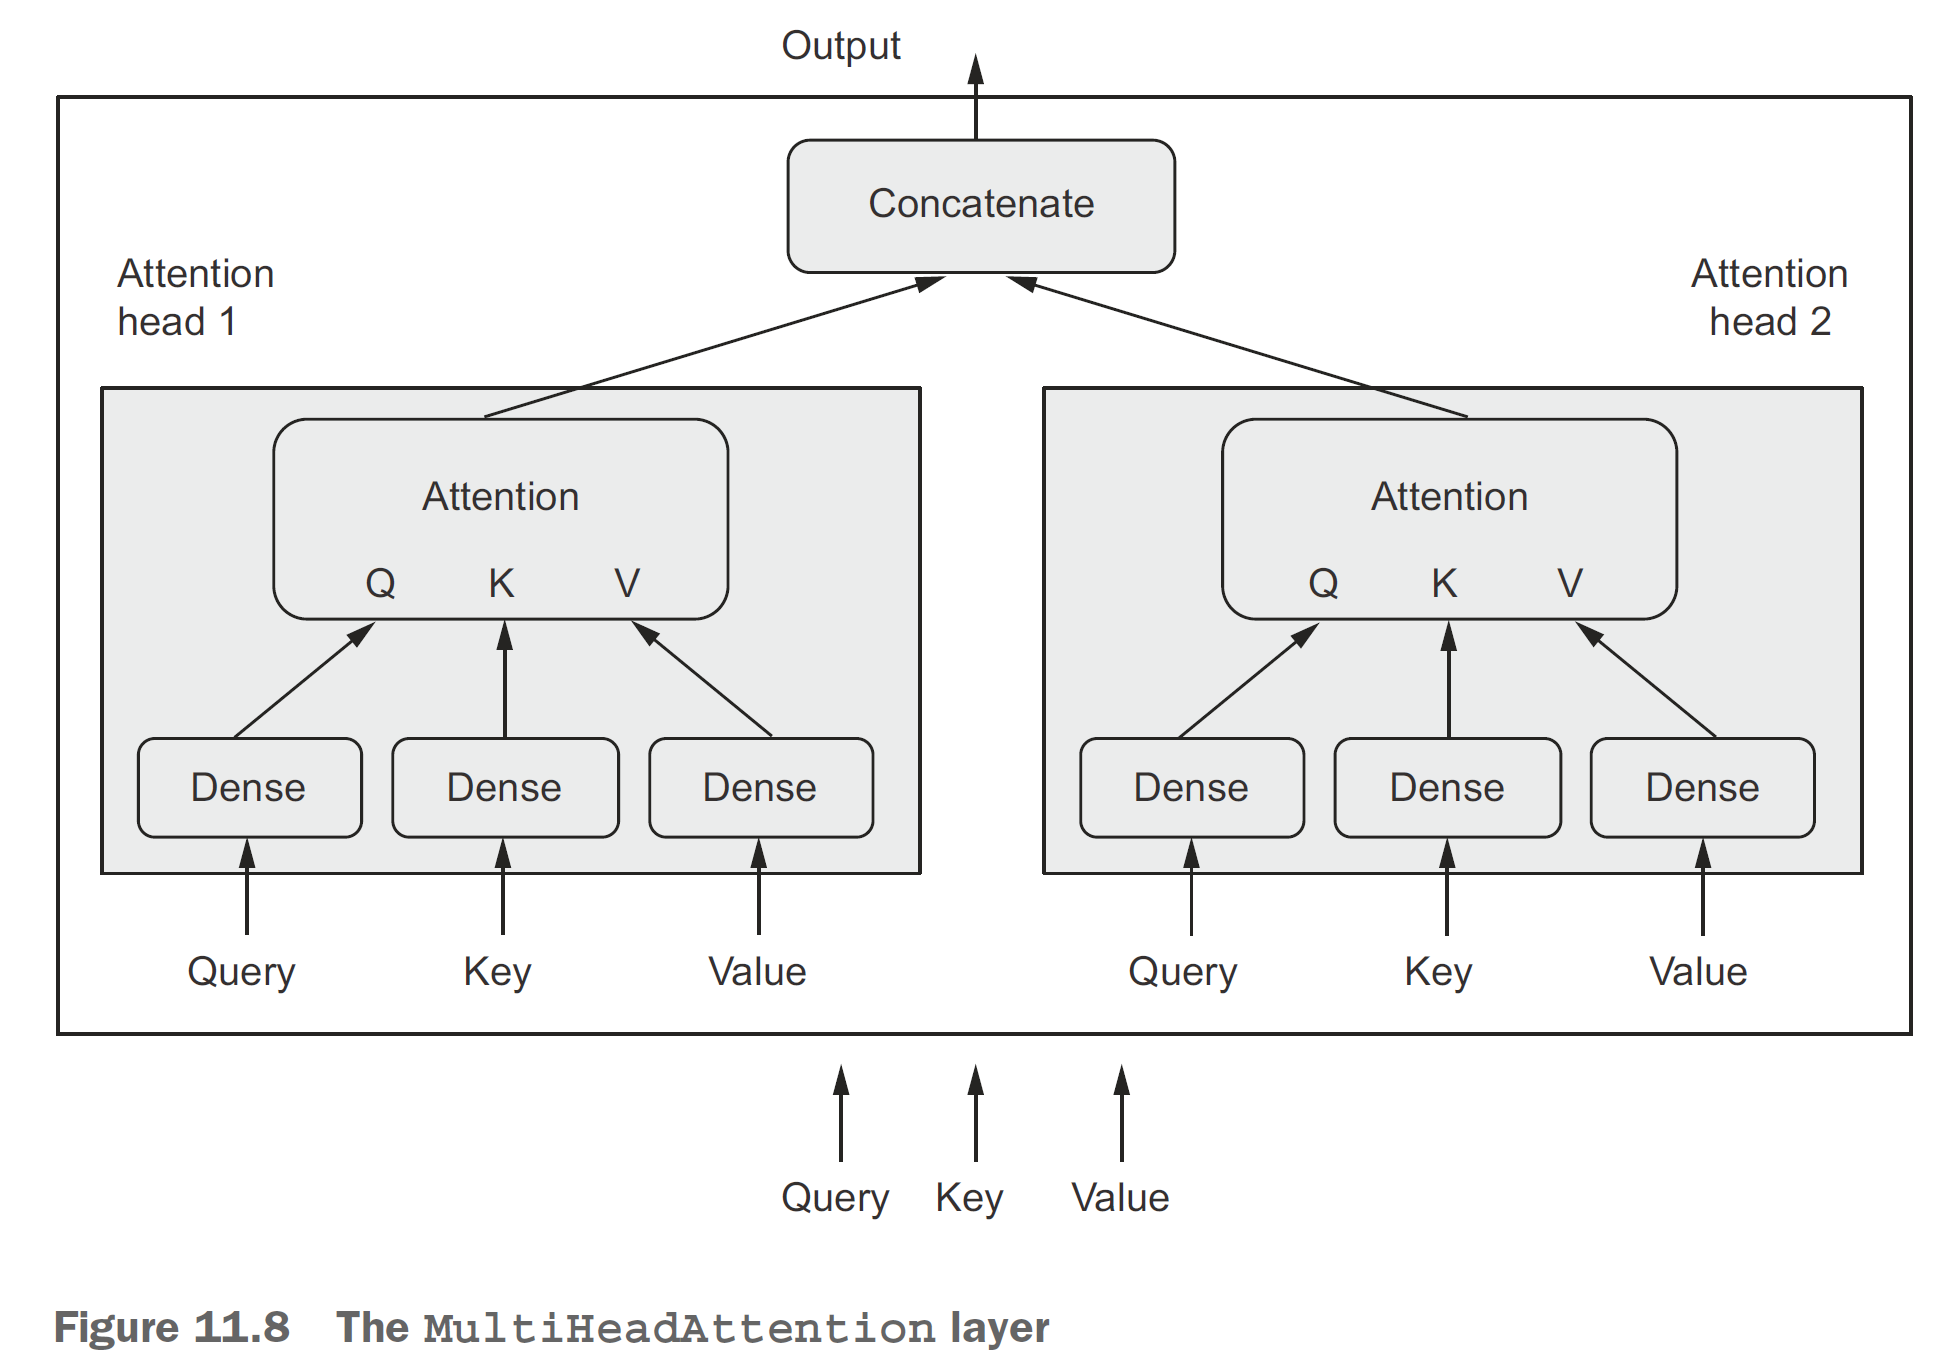

In multi-head attention, the process of computing attention weights is repeated multiple times, each time using a different set of learned projections. These multiple sets of attention weights allow the model to attend to different subspaces of the input sequence. The outputs from each of these attention heads are concatenated and projected back to the original feature dimensionality, providing the final output of the multi-head attention layer.

The number of attention heads is a hyperparameter of the model and can be adjusted to balance computational efficiency and model performance. The multi-head attention mechanism enables the Transformer architecture to capture complex relationships between tokens in a sequence, leading to state-of-the-art results in a variety of NLP tasks.

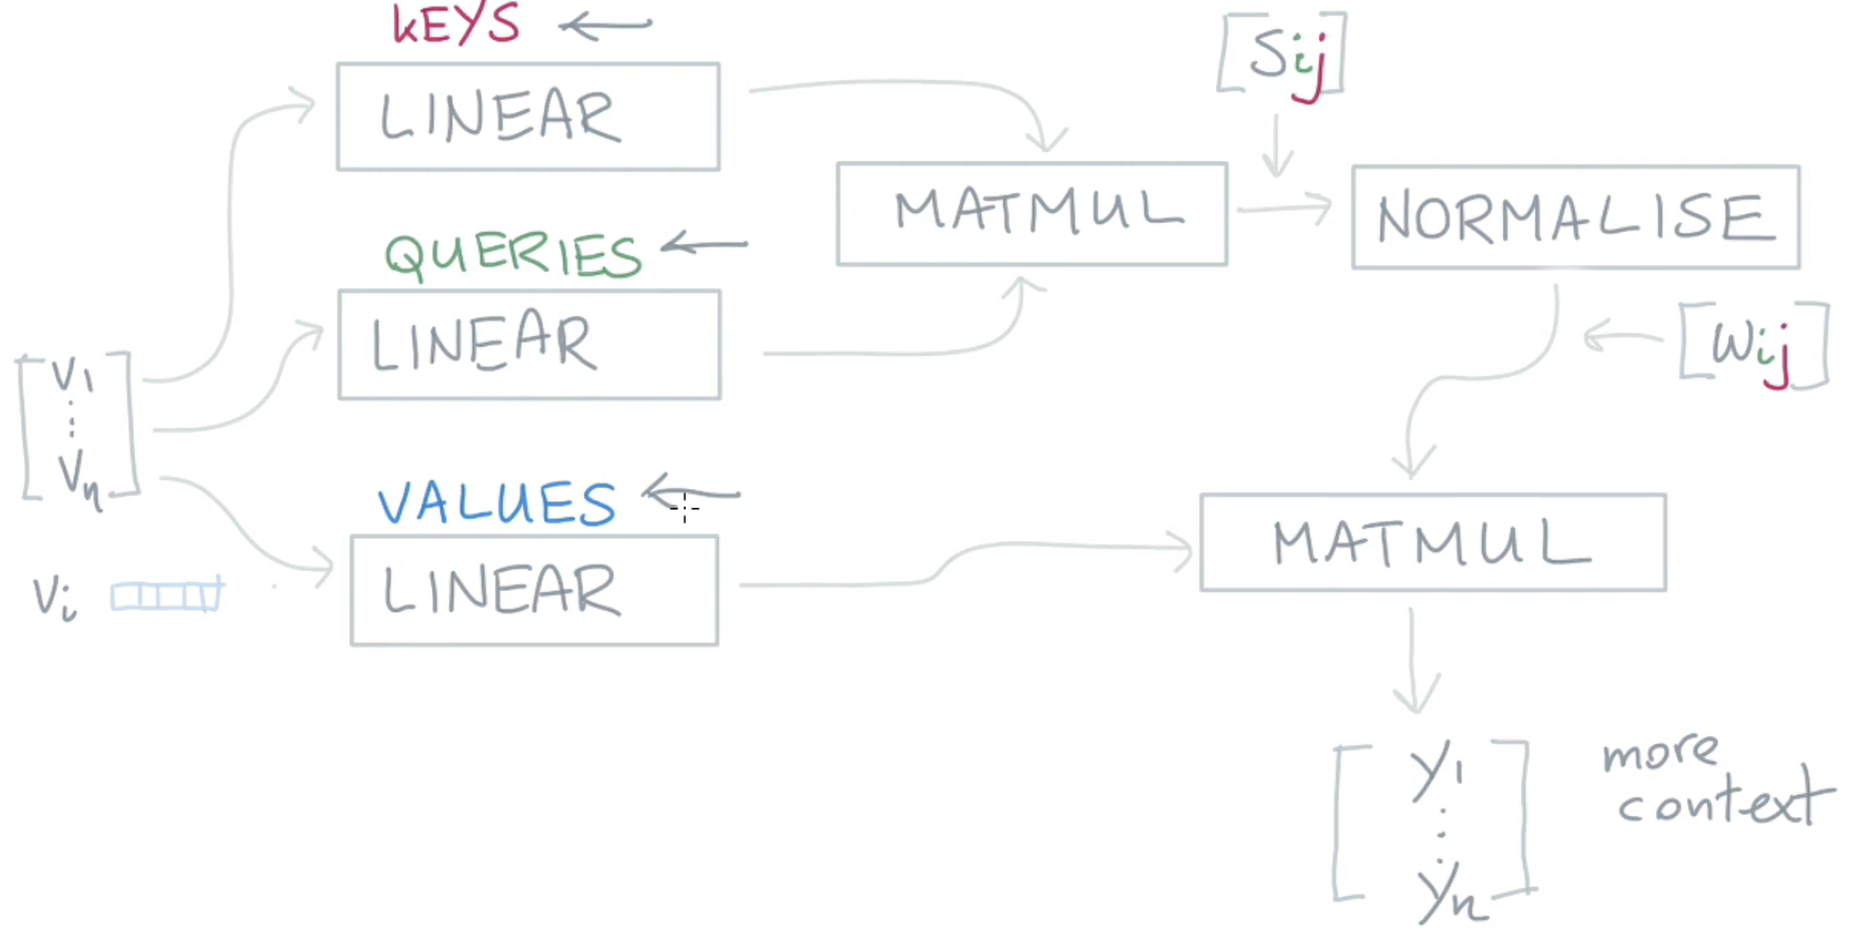

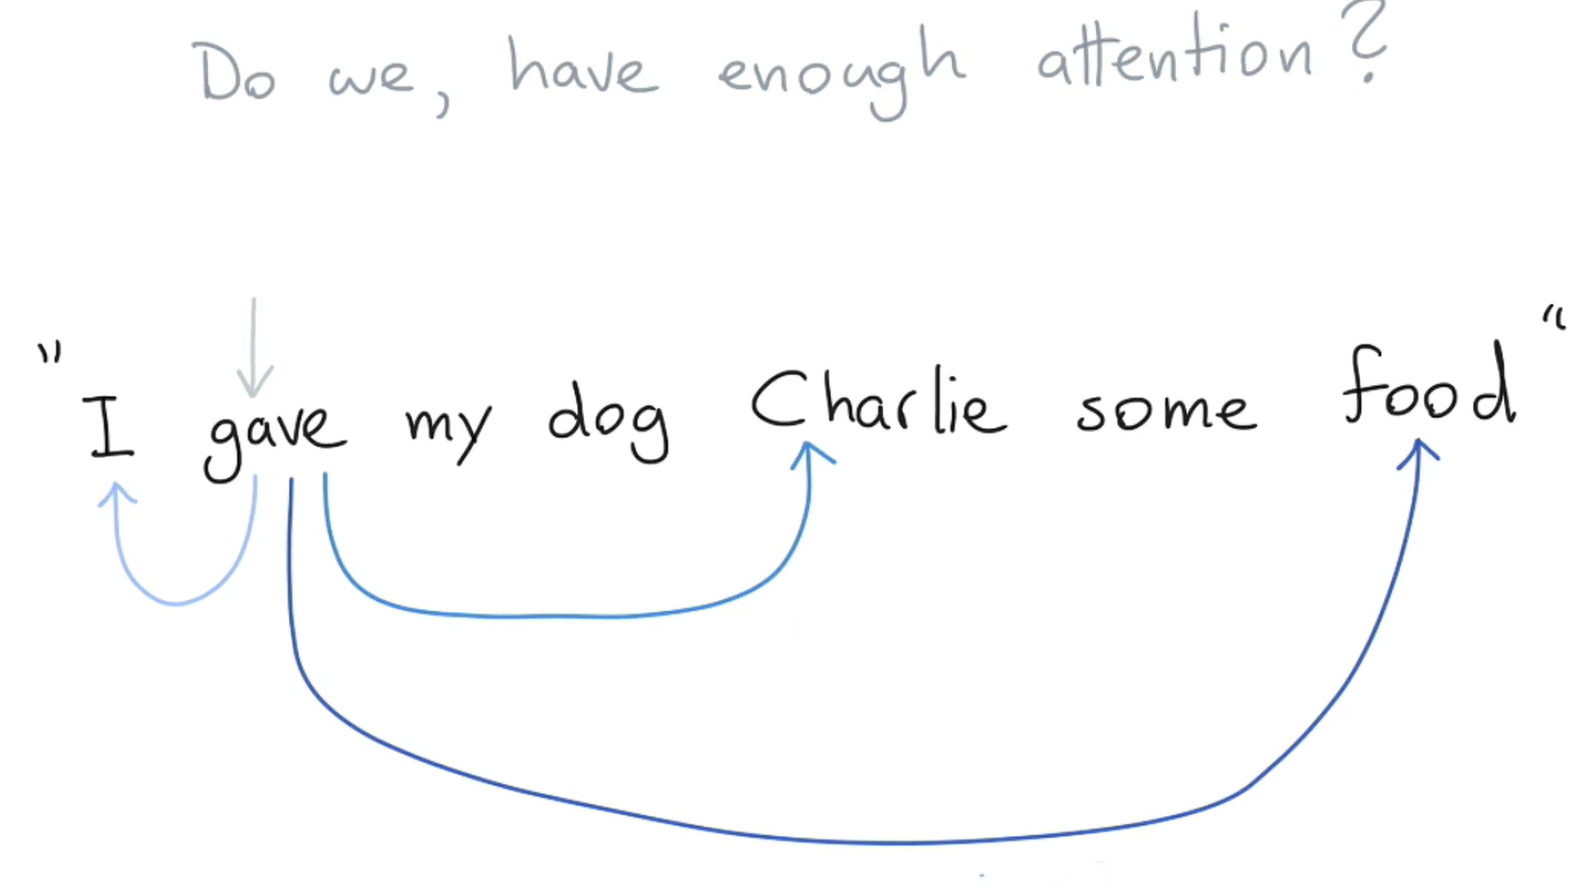

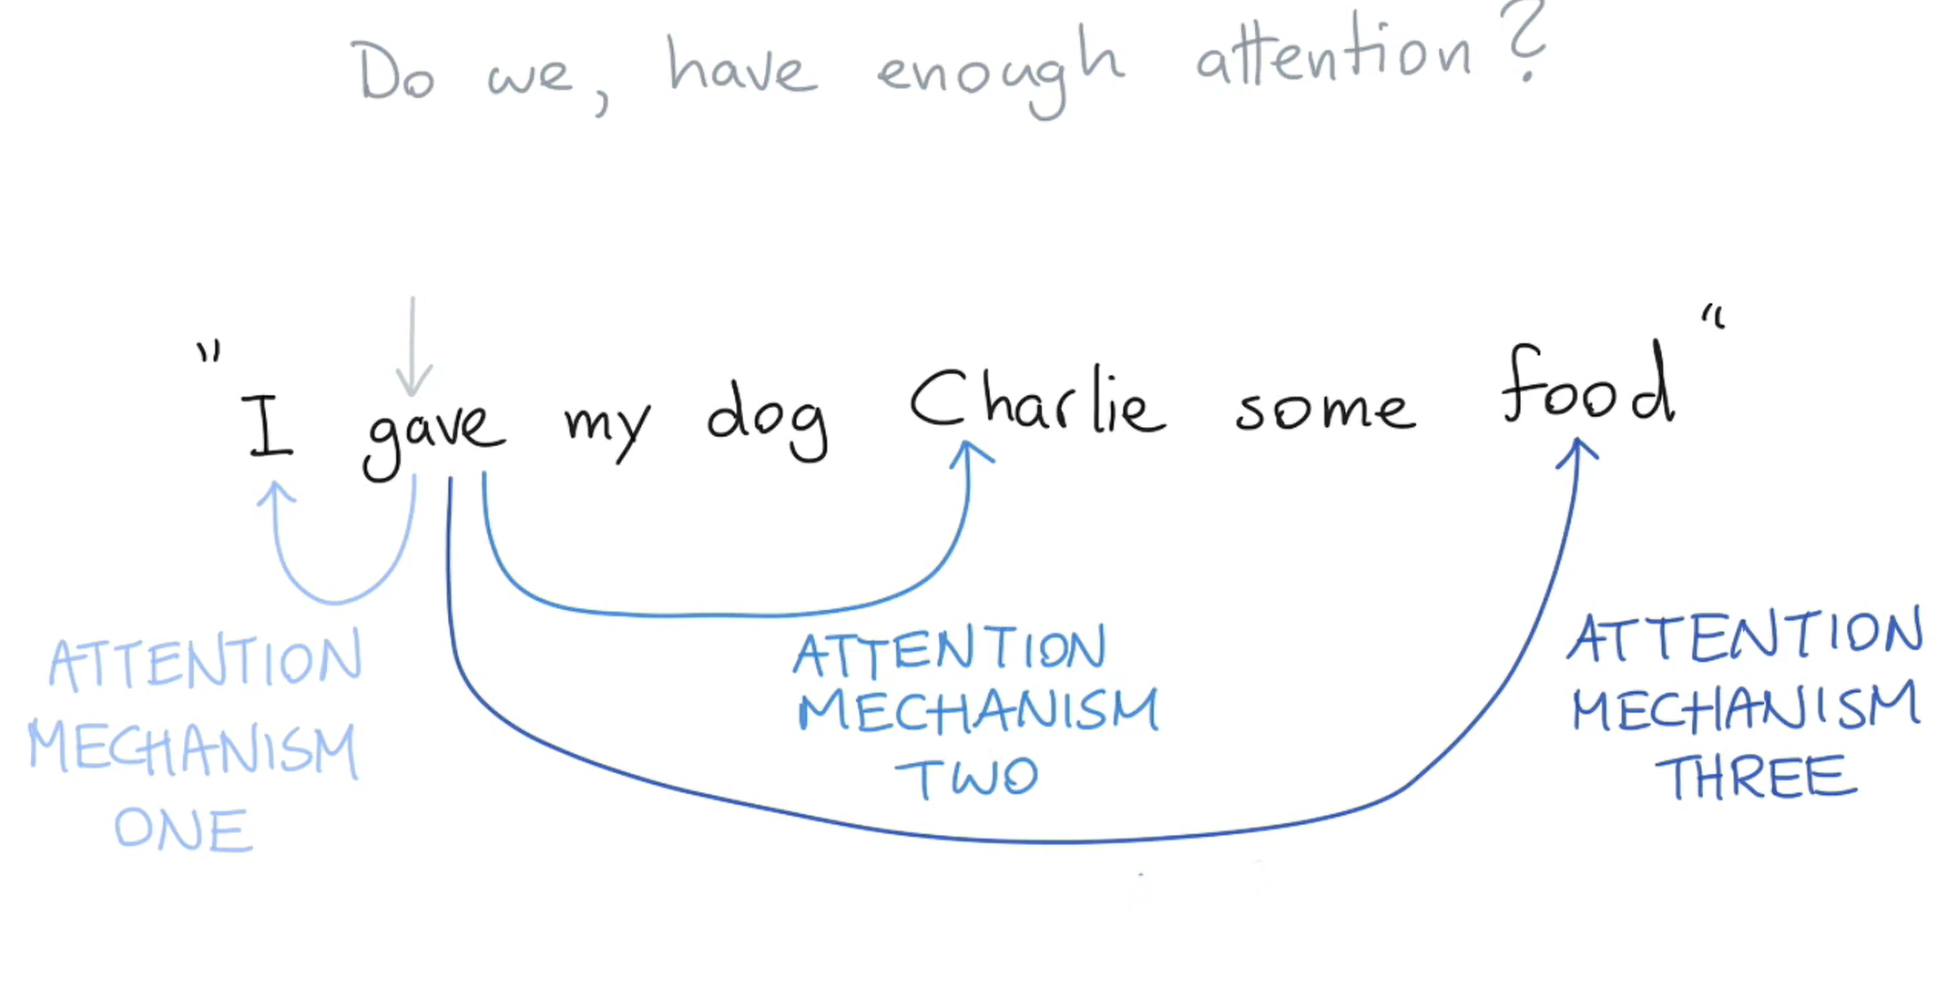

Model would do well in having more than just one attention mechanism. By having multiple ones we might make it easier and we don't have to over saturate one single attention mechanism because we spread the cognitive load on multiple ones.

how these attention mechanisms are learned and trained that will depend heavily on the task that we give this attention

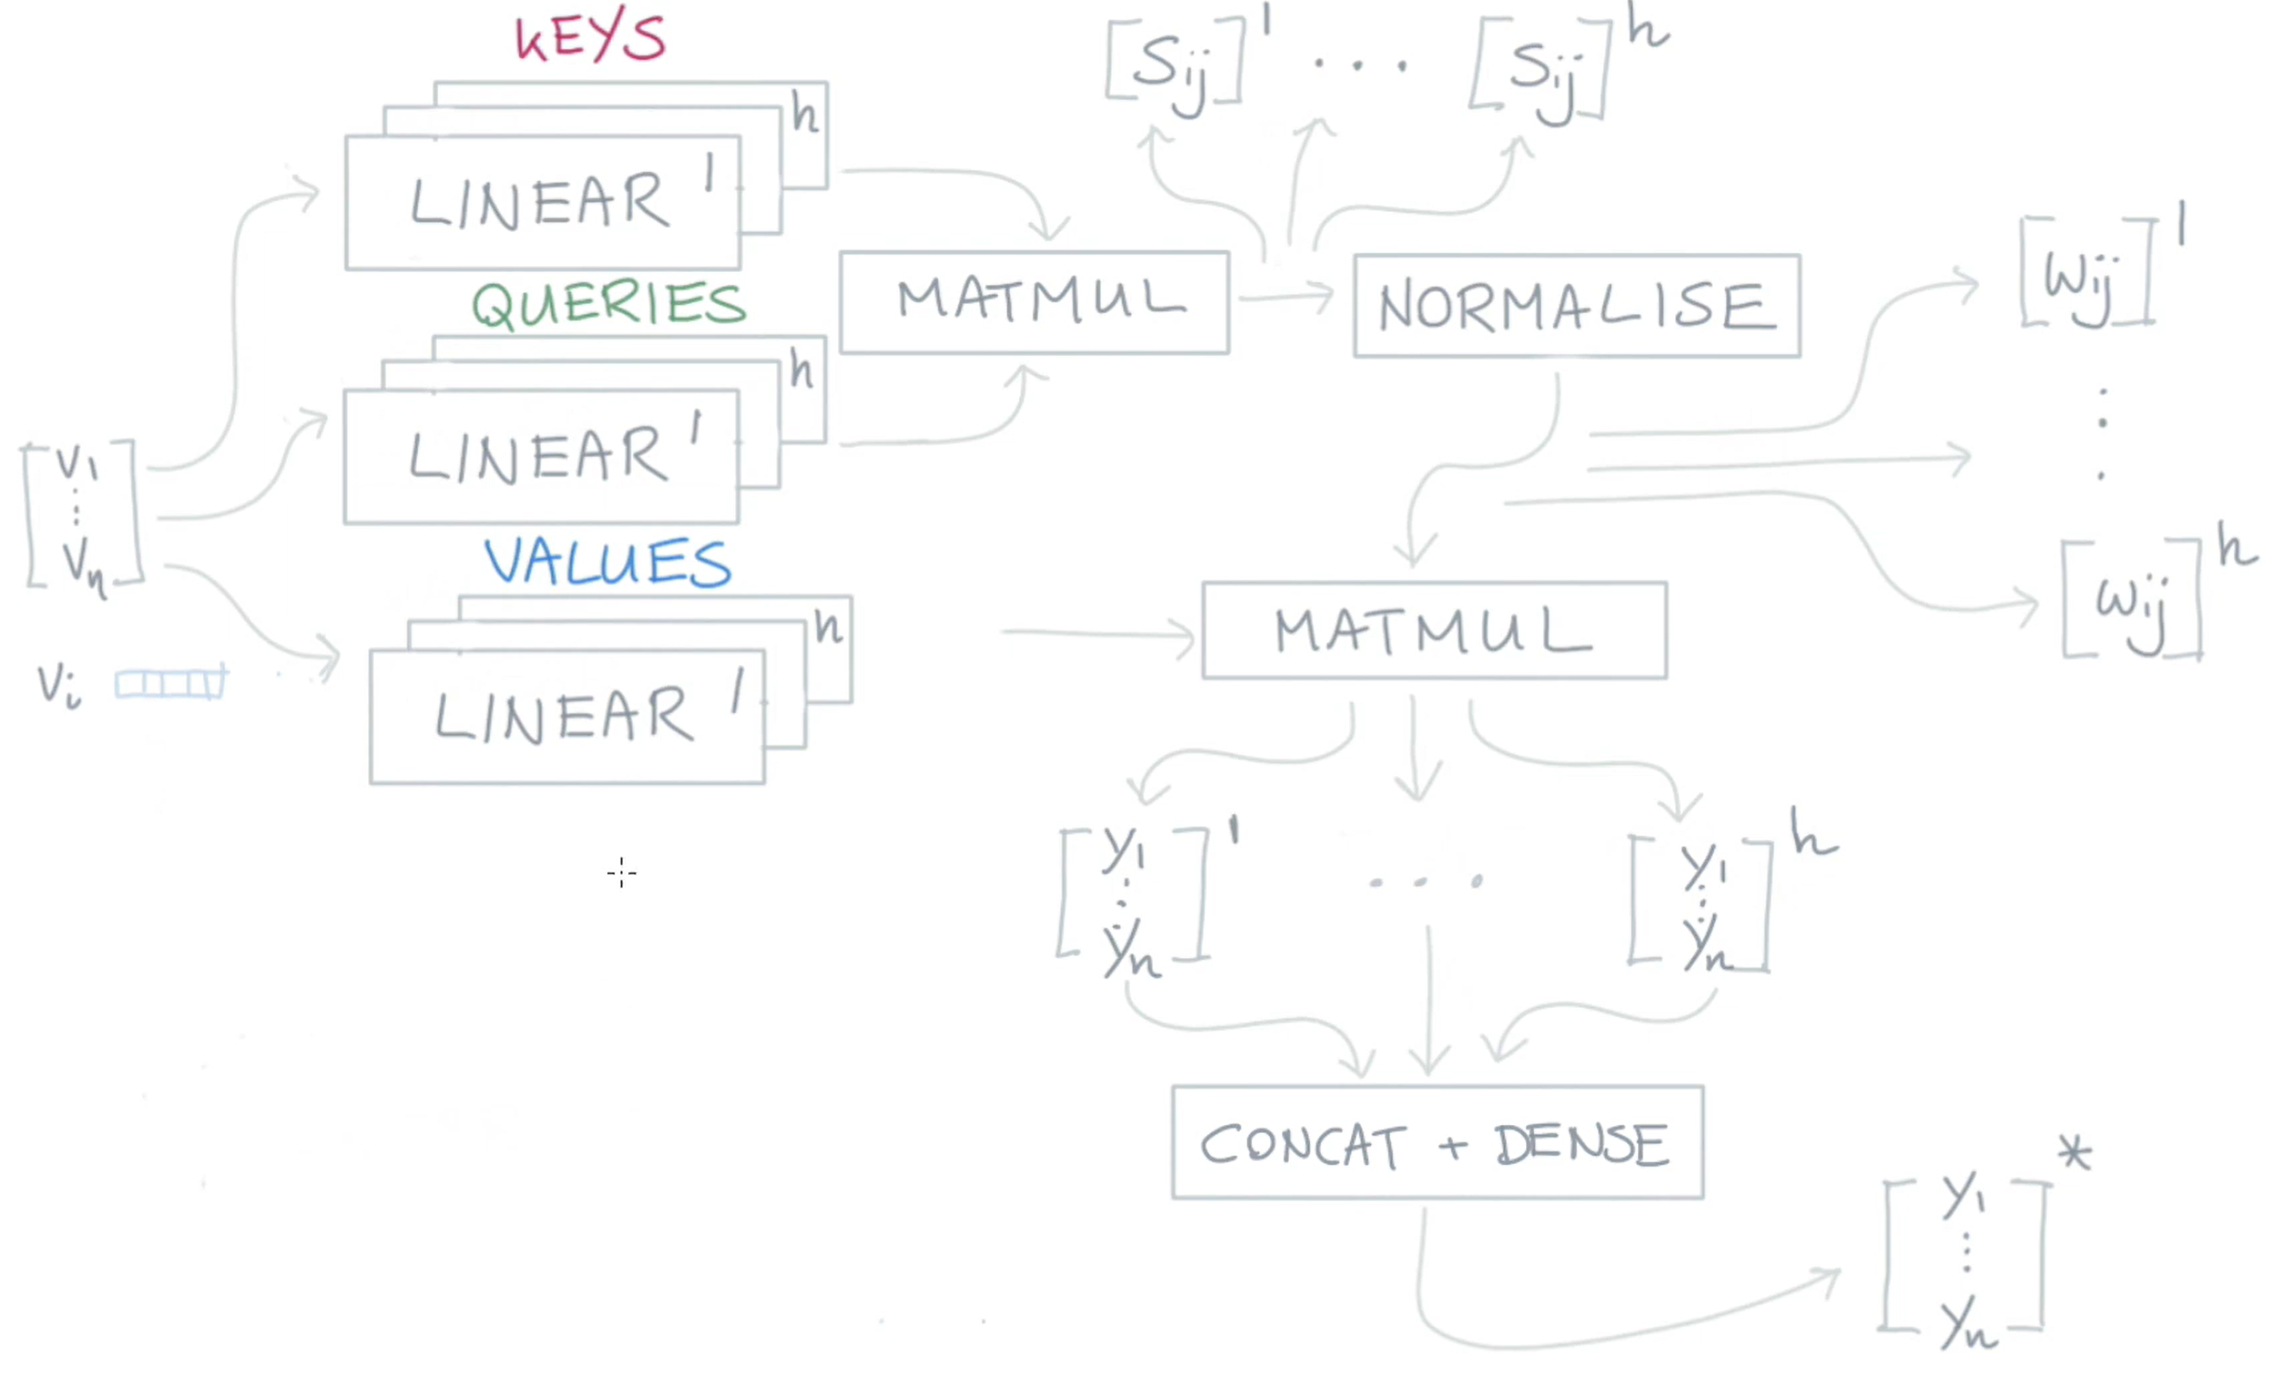